# Introduction

### Data for current sources of electricity generation in the US:

**Data source: https://www.eia.gov/tools/faqs/faq.php?id=427&t=3**

As things stand, we know that a majority of our energy is generated from fossil fuels, we wanted to confirm this and represent it visually using a pie-chart. So we found a small dataset for this purpose as cited above and we wrote the code for presenting an analysis of it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import holoviews as hv
import bokeh
# bokeh.sampledata.download()

In [2]:
data_energy=pd.read_csv('energy_source_us.csv').sort_values('Billion kWh',ascending=False)

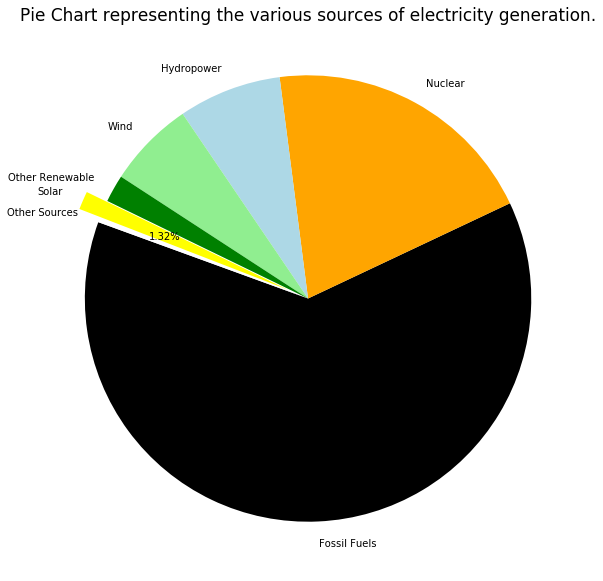

In [3]:
def percent(x):
    return ('%3.2f%%'%x) if x>1 and x<1.5 else ''
labels=data_energy['Energy source']
sizes=data_energy['Billion kWh']
explode=(0,0,0,0,0,0.1,0)
colors=('black','orange','lightblue','lightgreen','green','yellow','white')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Pie Chart representing the various sources of electricity generation.',fontsize=17)
plt.axis('equal')
plt.pie(sizes,labels=labels,explode=explode,autopct=percent,startangle=160,colors=colors)
plt.show()

# Part 1 Nationwide Analysis

## Step 1-1: Interactive US Map Visualization with Holoview

We are now going to develop, interactive US Map with the holoview library. With this we basically intend to visualize each state based on 2 factors: 
- Total energy potentially generated in kwh/year by each state.
- Total carbon potentially offset in metric tonnes by each state.

In [4]:
#Importing sunroof data and renaming it for further use:
data_map=pd.read_csv('project-sunroof-state-07192018.csv').rename(columns={'region_name':'NAME'}) 

In [5]:
#Writing a code to visualize different aspects of the data on the map of US:
state_name_map=[i for i in data_map['state_name']]           #Convert each useful column in dataframe to list
count_qualified_map=[i for i in data_map['count_qualified']]
percent_qualified_map=[i for i in data_map['percent_qualified']]
yearly_sunlight_kwh_total_map=[i for i in data_map['yearly_sunlight_kwh_total']]
number_of_panels_total_map=[i for i in data_map['number_of_panels_total']]
carbon_offset_metric_tons_map=[i for i in data_map['carbon_offset_metric_tons']]
existing_installs_count_map=[i for i in data_map['existing_installs_count']]
existing_installs_percent_map=[i for i in (data_map['existing_installs_count']/data_map['count_qualified'])]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
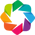

In [6]:
#Importing US map data:
from bokeh.sampledata.us_states import data as states         
from bokeh.plotting import figure, output_notebook, show
hv.notebook_extension('bokeh')

if "HI" in states: del states["HI"]
if "AK" in states: del states["AK"]
dat = list(states.values())

In [7]:
#Put all the information required at the end of each dictionary in the list, and use the name of state as keys to match all the data correctly:
for d in dat:
    for i in range(len(state_name_map)):
        if d['name']==state_name_map[i]:     #Check if the name of state is the same and match all the information
            d['count_qualified']=count_qualified_map[i]
            d['percent_qualified']=percent_qualified_map[i]
            d['yearly_sunlight_kwh_total']=yearly_sunlight_kwh_total_map[i]
            d['number_of_panels_total']=number_of_panels_total_map[i] 
            d['carbon_offset_metric_tons']=carbon_offset_metric_tons_map[i] 
            d['existing_installs_count']=existing_installs_count_map[i] 
            d['existing_installs_percent']=existing_installs_percent_map[i]
            d['existing_installs_percent_str']="{0:.4%}".format(existing_installs_percent_map[i])

In [8]:
#Drawing the map and coloring based on the total CO2 emission in metric tonnes that sunroof can potentially offset in each state:
choropleth = hv.Polygons(dat, ['lons', 'lats'], [('name','State'),('count_qualified','Number of Building Qualified for Solar Panel'),
                                                 ('percent_qualified','% of Buildings Suitable for Solar'),
                                                 ('yearly_sunlight_kwh_total','Potential kwh/year Generation by Solar Roof'),
                                                 ('number_of_panels_total','Potential Total Panels'),
                                                 ('carbon_offset_metric_tons','Potential Carbon Offset by Metric Tons'),
                                                ('existing_installs_count','Number of Building Have Solar Panel'),
                                                ('existing_installs_percent_str','% of Building Have Solar Panel')])
choropleth.options(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                   show_grid=False, show_frame=False, width=575, height=400,
                   color_index='carbon_offset_metric_tons', colorbar=True, toolbar='above', line_color='black')

:Polygons   [lons,lats]   (name,count_qualified,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,carbon_offset_metric_tons,existing_installs_count,existing_installs_percent_str)

In [9]:
#Drawing another map and coloring by the potential electricity that can be generated from sunroofs in kwh/year:
choropleth = hv.Polygons(dat, ['lons', 'lats'], [('name','State'),('count_qualified','Number of Building Qualified for Solar Panel'),
                                                 ('yearly_sunlight_kwh_total','Potential kwh/year Generation by Solar Roof')])
choropleth.options(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                   show_grid=False, show_frame=False, width=575, height=400,
                   color_index='yearly_sunlight_kwh_total', colorbar=True, toolbar='above', line_color='black')

:Polygons   [lons,lats]   (name,count_qualified,yearly_sunlight_kwh_total)

## Step 1-2: Calculate potential carbon offset and saving per person

In [10]:
#Import population data
data_pop=pd.read_csv('nst-est2017-popchg2010_2017.csv')  
pd.set_option('display.max_columns', 1000)

In [11]:
#Merge data from population and sunroof by name of the states
data_map_pop=pd.merge(data_map,data_pop,left_on='NAME',right_on='NAME').dropna()

In [12]:
#Calculate panels per 1 million people and potential carbon offset per person, append them to dataframe
data_map_pop['panel_per_1m']=data_map_pop['existing_installs_count']/data_map_pop['POPESTIMATE2017']*1000000
data_map_pop['carbon_offset_per_person']=data_map_pop['carbon_offset_metric_tons']/data_map_pop['POPESTIMATE2017']

#### Top 5 States with Panels per Million Population

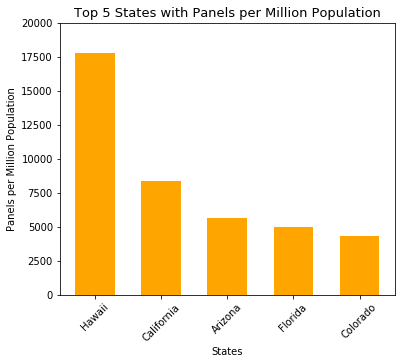

In [13]:
data_map_pop_sort=data_map_pop.sort_values('panel_per_1m',ascending=False)
data_map_pop_sort_num=data_map_pop_sort.head(5)['panel_per_1m']
data_map_pop_sort_name=data_map_pop_sort.head(5)['NAME']
plt.figure(figsize=(6,5)) 
plt.bar(range(len(data_map_pop_sort_name)),data_map_pop_sort_num,tick_label=data_map_pop_sort_name,width=0.6,color='orange')
plt.xticks(rotation=45)
plt.ylim(0,20000)
plt.title('Top 5 States with Panels per Million Population',fontsize=13)
plt.xlabel('States',fontsize=10)
plt.ylabel('Panels per Million Population',fontsize=10)
plt.show()

#### Potential Carbon Offset perPerson

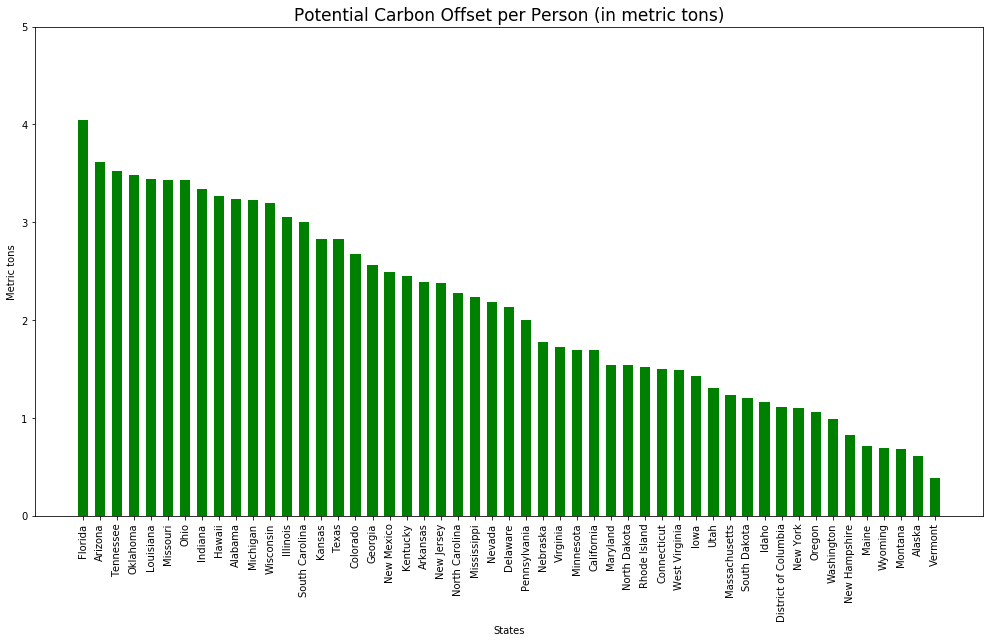

In [14]:
#Writing code to plot a bar graph for potential carbon offset per person: 
data_map_pop_sort_carbon=data_map_pop.sort_values('carbon_offset_per_person',ascending=False)
data_map_pop_sort_carbon_num=data_map_pop_sort_carbon['carbon_offset_per_person']
data_map_pop_sort_carbon_name=data_map_pop_sort_carbon['NAME']
plt.figure(figsize=(17,9)) 
plt.bar(range(len(data_map_pop_sort_carbon_name)),data_map_pop_sort_carbon_num,tick_label=data_map_pop_sort_carbon_name,width=0.6,color='green')
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.title('Potential Carbon Offset per Person (in metric tons)',fontsize=17)
plt.xlabel('States',fontsize=10)
plt.ylabel('Metric tons',fontsize=10)
plt.show()

#### Potential Money per Person can Save per Year ($)

Potential money that a 4 people household can save:  1835.91


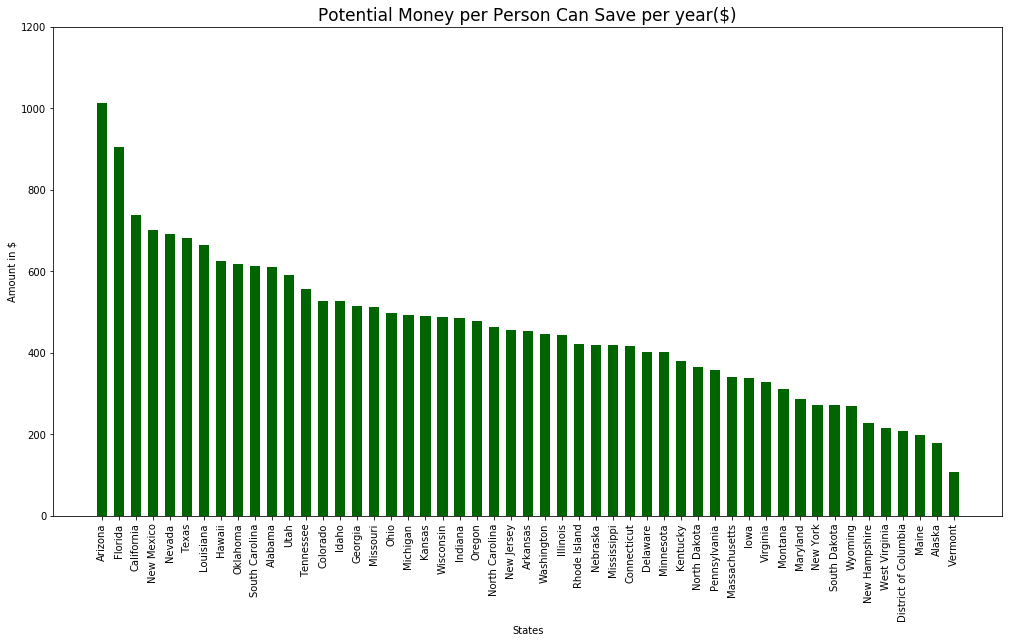

In [15]:
#Calculate the potential money each person can save by using (potential kwh/population)*(average cost per kwh)
data_map_pop['save_per_person']=data_map_pop['yearly_sunlight_kwh_total']/data_map_pop['POPESTIMATE2017']*0.12

print('Potential money that a 4 people household can save: ',round(4*data_map_pop['save_per_person'].mean(),2))

data_map_pop_sort_kwh=data_map_pop.sort_values('save_per_person',ascending=False)
data_map_pop_sort_kwh_num=data_map_pop_sort_kwh['save_per_person']
data_map_pop_sort_kwh_name=data_map_pop_sort_kwh['NAME']
plt.figure(figsize=(17,9)) 
plt.bar(range(len(data_map_pop_sort_kwh_name)),data_map_pop_sort_kwh_num,tick_label=data_map_pop_sort_kwh_name,width=0.6,color='darkgreen')
plt.xticks(rotation=90)
plt.ylim(0,1200)
plt.title('Potential Money per Person Can Save per year($)',fontsize=17)
plt.xlabel('States',fontsize=10)
plt.ylabel('Amount in $',fontsize=10)
plt.show()

For this graph we used the data regarding potential electricity generation from each state and also the current cost per unit of electricity in each state. It is clear from the plot that Arizona, Florida and California have the maximum potential savings by installing sunroofs but also generally speaking, Most of the states have the potential of saving a lot of money. We have also calculated that the average potential savings for a 4 person household in the United States will be approximately 1900 Dollars.

# Part 2 States with Highest Energy Generation Potential

Code for finding clusters in data set based on existing number of cells , carbon offset, and percentage of roofs qualified

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Step 2-1: Finding the Clusters

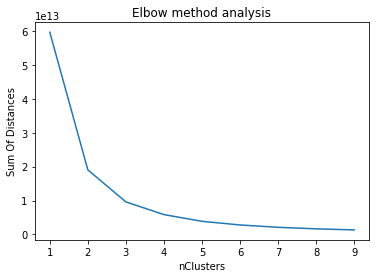

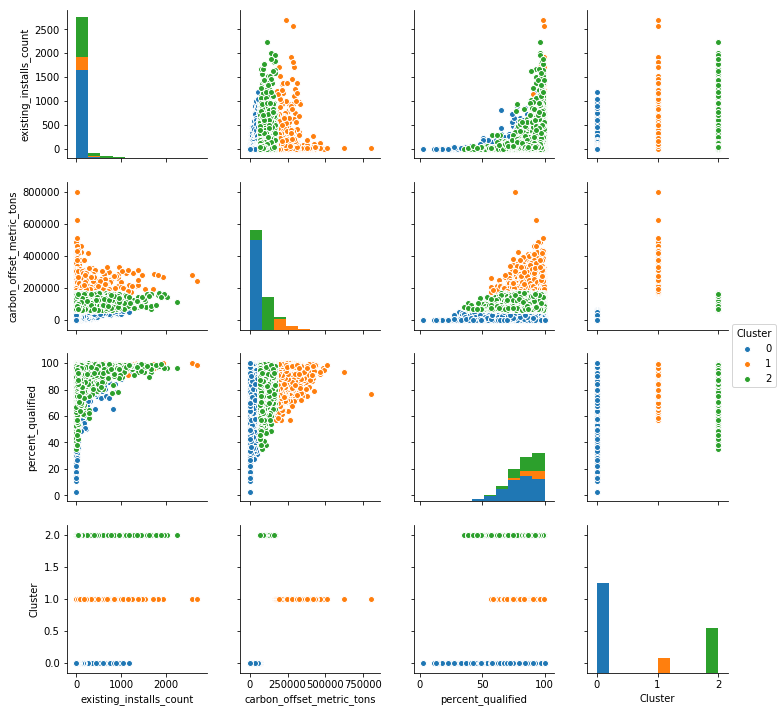

In [17]:
inData = pd.read_csv('project-sunroof-postal_code-07182018.csv')
inData = inData.dropna()

#Determining number of clusters
nClusters=range(1,10)
sumDistances=[]
explainOfPart=[]

#Including the potential attributes for Clustering
rel_cols_New=['existing_installs_count','carbon_offset_metric_tons','percent_qualified']
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(inData[rel_cols_New])
    sumDistances.append(kmeans.inertia_) 
    

#Plotting the SSE vs Number of clusters
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.title('Elbow method analysis')
plt.show()

#Using 3 clusters based on the elbow method 
inData = inData[rel_cols_New]
kmeans=KMeans(n_clusters=3).fit(inData)
inData['Cluster']=kmeans.labels_
g = sns.pairplot(inData,hue='Cluster')

## Step 2-2: States with Highest Energy Generation Potential

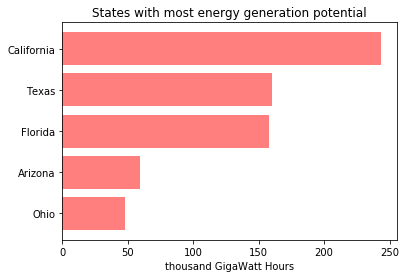

In [18]:
#Importing the data files
inData = pd.read_csv('project-sunroof-state-07192018.csv')
inData = inData.dropna()
histData = inData[['yearly_sunlight_kwh_total','region_name']]

#Selecting the top 5 states
inData=inData.sort_values(['yearly_sunlight_kwh_total']).iloc[-5:]

inData['yearly_sunlight_kwh_total'] = inData['yearly_sunlight_kwh_total']/1000000000

#Plotting a horizontal bar graph
plt.barh(inData['region_name'], inData['yearly_sunlight_kwh_total'], align='center', alpha=0.5,color='r')
plt.xlabel('thousand GigaWatt Hours')
plt.title('States with most energy generation potential')
plt.savefig('energy.png')

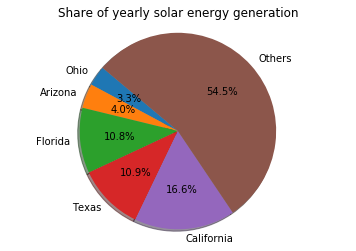

In [19]:
#Code to get the Sum of Others
#Input the file
inData = pd.read_csv('project-sunroof-state-07192018.csv')

#Share data to others value calculator
DataCopy = inData[['yearly_sunlight_kwh_total']].sort_values(['yearly_sunlight_kwh_total'],ascending=False).iloc[5:,:]
others = 0
for row in DataCopy.itertuples():
    i,x = row
    others = others + x

#Code to get the top 5 Energy Potentials
refine = pd.DataFrame(inData.loc[:,['yearly_sunlight_kwh_total','region_name']])
refine = refine.sort_values(['yearly_sunlight_kwh_total']).iloc[-5:]
kwhValues = refine['yearly_sunlight_kwh_total'].tolist()
regionNames = refine['region_name'].tolist()
regionNames.append('Others')

#Append the top 5 with the Others
kwhValues.append(others)
#display(kwhValues)
plt.title('Share of yearly solar energy generation')
plt.pie(kwhValues,labels=regionNames,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

- We analyzed the pie chart and found that California, Texas and Florida are the major contributors to total energy generation potential. This information helps us focus our attention where we can get the maximum results from minimum effort.

# Part 3 Extended Analysis on Energy Generation Potential and Carbon Offset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

## Step 3-1: Data Cleaning

In [21]:
#Importing datasets for Google SunRoof project for State wise and postal code wise
dataset = pd.read_csv('project-sunroof-postal_code-07182018.csv')
datasetState = pd.read_csv('project-sunroof-state-07192018.csv')

In [22]:
#Describing data for the basic descriptive stats
dataset.describe()

region_name       lat_max       lat_min       lng_max       lng_min  \
count  11438.000000  11438.000000  11438.000000  11438.000000  11438.000000   
mean   48545.684473     37.814508     37.726737    -90.530364    -90.641181   
std    29934.638368      5.083575      5.090762     16.063429     16.074819   
min     1001.000000     19.687146     19.536282   -158.051524   -158.129878   
25%    22697.500000     34.019733     33.952453    -97.113963    -97.212092   
50%    45248.500000     39.099200     39.031937    -85.667247    -85.794692   
75%    76711.750000     41.434036     41.336377    -78.660060    -78.787501   
max    99712.000000     67.409597     64.845766    -68.138157    -68.240502   

            lat_avg       lng_avg  yearly_sunlight_kwh_kw_threshold_avg  \
count  11438.000000  11438.000000                          11438.000000   
mean      37.770414    -90.585689                           1072.646022   
std        5.085697     16.069829                            129.635359   
min       19.609050   -158.079487                            687.650000   
25%       33.988694    -97.151715                            980.900000   
50%       39.073658    -85.722971                           1048.050000   
75%       41.388437    -78.714100                           1135.600000   
max       64.895632    -68.234382                           1437.350000   

       count_qualified  percent_covered  percent_qualified  \
count     11438.000000     11438.000000       11438.000000   
mean       4902.772425        79.507989          82.412171   
std        4616.365495        30.295481          13.403991   
min           0.000000         0.007612           0.000000   
25%         733.000000        75.000000          75.009670   
50%        3920.000000        95.543911          84.517970   
75%        7768.750000        98.435653          92.463134   
max       31973.000000       100.000000         100.000000   

       number_of_panels_n  number_of_panels_s  number_of_panels_e  \
count        11438.000000        11438.000000        11438.000000   
mean         22359.633677        84489.544239        55353.646704   
std          32970.791881        88006.133659        60410.129954   
min              0.000000            0.000000            0.000000   
25%           1730.000000        11514.750000         7423.500000   
50%           8589.500000        59968.000000        36247.500000   
75%          29246.250000       129599.750000        83410.250000   
max         363833.000000       799219.000000       593805.000000   

       number_of_panels_w  number_of_panels_f  number_of_panels_median  \
count        11438.000000        1.143800e+04             11419.000000   
mean         66664.483913        1.685321e+05                87.289342   
std          73999.289399        1.971621e+05               395.660869   
min              0.000000        0.000000e+00                 8.000000   
25%           8259.250000        2.159850e+04                31.000000   
50%          42537.000000        1.086020e+05                42.000000   
75%         101529.250000        2.443970e+05                55.000000   
max         716810.000000        2.843974e+06             19151.000000   

       number_of_panels_total     kw_median       kw_total  \
count            1.141900e+04  11419.000000   11419.000000   
mean             3.980607e+05     21.822336   99515.164091   
std              3.907094e+05     98.915217   97677.355546   
min              8.000000e+00      2.000000       2.000000   
25%              6.668250e+04      7.750000   16670.625000   
50%              2.915780e+05     10.500000   72894.500000   
75%              6.192855e+05     13.750000  154821.375000   
max              3.279590e+06   4787.750000  819897.500000   

       yearly_sunlight_kwh_n  yearly_sunlight_kwh_s  yearly_sunlight_kwh_e  \
count           1.143800e+04           1.143800e+04           1.143800e+04   
mean            6.465693e+06           2.884174e+07      

In [23]:
#Picking out relevant columns and also cleaning data where some attribute is missing
dataframe = dataset.loc[:,['region_name','state_name','lat_avg','lng_avg','yearly_sunlight_kwh_kw_threshold_avg','count_qualified', 'percent_covered', 'percent_qualified','number_of_panels_total','kw_total','yearly_sunlight_kwh_total','carbon_offset_metric_tons', 'existing_installs_count']]
data = pd.DataFrame(dataframe)
data = data.dropna()

In [24]:
#Checking for shape of data in order to get the dimension of our observations
data.shape

(11419, 13)

## Step 3-2: Exploratory Data Analysis

Bar plot of top 5 and bottom 5 states as per yearly_sunlight_kwh_total

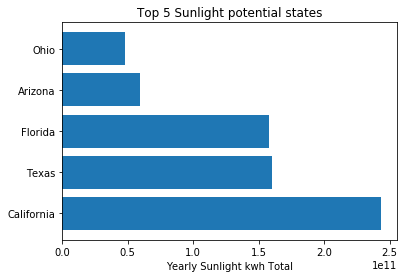

In [25]:
#Checking which 5 states are the top 5 in terms of yearly_sunlight_kwh_total
yearly_sunlight_kwh = datasetState.loc[:,['state_name','yearly_sunlight_kwh_total']]
yearly_sunlight_kwhSorted = yearly_sunlight_kwh.sort_values('yearly_sunlight_kwh_total',ascending=0)
yr = yearly_sunlight_kwhSorted.head(5)
plt.barh(yr['state_name'],yr['yearly_sunlight_kwh_total'])
plt.xlabel('Yearly Sunlight kwh Total')
plt.title('Top 5 Sunlight potential states')
plt.show()

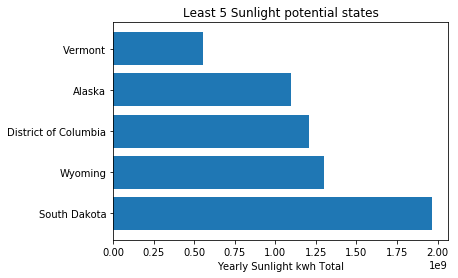

In [26]:
#Checking which 5 states are the bottom 5 in terms of yearly_sunlight_kwh_total
yrTail = yearly_sunlight_kwhSorted.tail(5)
plt.barh(yrTail['state_name'],yrTail['yearly_sunlight_kwh_total'])
plt.xlabel('Yearly Sunlight kwh Total')
plt.title('Least 5 Sunlight potential states')
plt.show()

Bar plot of top 5 and bottom 5 states as per carbon_offset_metric_tons

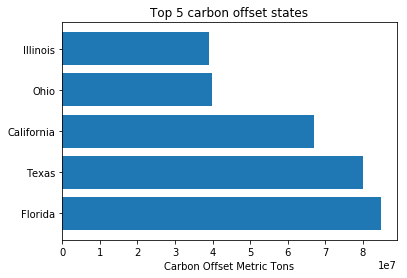

In [27]:
#Checking which 5 states are the top 5 in terms of carbon_offset_metric_tons
carbon_offset_metric_tons = datasetState.loc[:,['state_name','carbon_offset_metric_tons']]
carbon_offset_metric_tonsSorted = carbon_offset_metric_tons.sort_values('carbon_offset_metric_tons',ascending=0)
yrC = carbon_offset_metric_tonsSorted.head(5)
plt.barh(yrC['state_name'],yrC['carbon_offset_metric_tons'])
plt.xlabel('Carbon Offset Metric Tons')
plt.title('Top 5 carbon offset states')
plt.show()

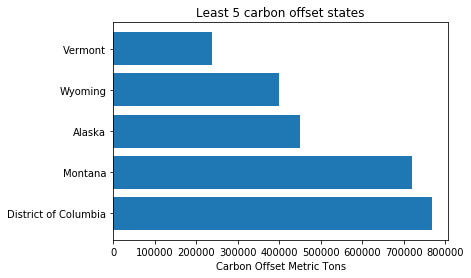

In [28]:
#Checking which 5 states are the bottom 5 in terms of carbon_offset_metric_tons
yrTailC = carbon_offset_metric_tonsSorted.tail(5)
plt.barh(yrTailC['state_name'],yrTailC['carbon_offset_metric_tons'])
plt.xlabel('Carbon Offset Metric Tons')
plt.title('Least 5 carbon offset states')
plt.show()

## Step 3-3: Heatmap Analysis

#### filtering data with records for  yearly_sunlight_kwh_kw_threshold_avg more than 75 percentile 

In [29]:
dataAll = data.query("yearly_sunlight_kwh_kw_threshold_avg > 1135.600000")

In [30]:
#Checking the dimesion of data after filtering
dataAll.shape

(2757, 13)

In [31]:
#Visualizing the 10 states in terms of the heatmaps
map_fol = folium.Map(location=[39.7783, -98.4842],
                    zoom_start = 4) 

# Ensure you're handing it floats
dataAll['lat_avg'] = dataAll['lat_avg'].astype(float)
dataAll['lng_avg'] = dataAll['lng_avg'].astype(float)
# List comprehension to make out list of lists
heat_data = [[row['lat_avg'],row['lng_avg']] for index, row in dataAll.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_fol)

# Display the map
map_fol
#map_fol.save("yearly_sunlight_kwh_kw_threshold_avg.html")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### filtering data with records for  carbon_offset_metric_tons more than 75 percentile 

In [32]:
data_carbon = data.query("carbon_offset_metric_tons > 104065.222992")

In [33]:
#Verifying the shape of data after filtering
data_carbon.shape

(2860, 13)

In [34]:
#Visualizing the 10 states in terms of the heatmaps for carbon_offset_metric_tons
map_carbon = folium.Map(location=[39.7783, -98.4842],
                    zoom_start = 4) 

# Ensure handing of floats
data_carbon['lat_avg'] = data_carbon['lat_avg'].astype(float)
data_carbon['lng_avg'] = data_carbon['lng_avg'].astype(float)
# List comprehension to make out list of lists
heat_data = [[row['lat_avg'],row['lng_avg']] for index, row in data_carbon.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_carbon)

# Display the map
map_carbon
#map_carbon.save("carbon_offset_metric_tons.html")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Part 4 Statistical Analysis

## Step 4-1: Dealing with data

In [35]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 

In [36]:
rawData = pd.read_csv('project-sunroof-postal_code-07182018.csv')
rawData.head()

region_name     state_name    lat_max    lat_min    lng_max    lng_min  \
0         1001  Massachusetts  42.099647  42.031153 -72.585478 -72.661521   
1         1002  Massachusetts  42.437565  42.298464 -72.402813 -72.598658   
2         1003  Massachusetts  42.406249  42.381574 -72.506178 -72.537975   
3         1007  Massachusetts  42.351442  42.186356 -72.332541 -72.471648   
4         1013  Massachusetts  42.197571  42.127819 -72.585709 -72.626135   

     lat_avg    lng_avg  yearly_sunlight_kwh_kw_threshold_avg  \
0  42.067515 -72.622952                                963.05   
1  42.372545 -72.510396                                962.20   
2  42.395607 -72.520051                                962.20   
3  42.261784 -72.404075                                962.20   
4  42.162355 -72.607535                                963.05   

   count_qualified  percent_covered  percent_qualified  number_of_panels_n  \
0             4579        97.221776          75.635943                7898   
1             1958        61.438582          65.682657                6934   
2               79        67.647059          85.869565                 746   
3                3         0.057372         100.000000                   0   
4             5684        97.527201          82.352941                8789   

   number_of_panels_s  number_of_panels_e  number_of_panels_w  \
0               78527               55365               49397   
1               44124               24354               27123   
2                2556                4479                5082   
3                 202                   0                   8   
4               84958               49981               44581   

   number_of_panels_f  number_of_panels_median  number_of_panels_total  \
0              223012                     32.0                414199.0   
1               86699                     34.0                189234.0   
2               19406                    256.0                 32269.0   
3                   0                     84.0                   210.0   
4              131333                     29.0                319642.0   

   kw_median   kw_total  yearly_sunlight_kwh_n  yearly_sunlight_kwh_s  \
0       8.00  103549.75           1.930724e+06           2.285122e+07   
1       8.50   47308.50           1.710399e+06           1.292778e+07   
2      64.00    8067.25           1.854609e+05           7.746877e+05   
3      21.00      52.50           0.000000e+00           5.915877e+04   
4       7.25   79910.50           2.158643e+06           2.511972e+07   

   yearly_sunlight_kwh_e  yearly_sunlight_kwh_w  yearly_sunlight_kwh_f  \
0           1.490899e+07           1.300299e+07           6.336049e+07   
1           6.432950e+06           7.145378e+06           2.436891e+07   
2           1.197883e+06           1.420250e+06           5.463777e+06   
3           0.000000e+00           1.958668e+03           0.000000e+00   
4           1.355857e+07           1.182153e+07           3.740466e+07   

   yearly_sunlight_kwh_median  yearly_sunlight_kwh_total  \
0                 8745.289020               1.160544e+08   
1                 9323.784473               5.258541e+07   
2                72169.838007               9.042059e+06   
3                26050.184497               6.111744e+04   
4                 8169.985010               9.006311e+07   

                        install_size_kw_buckets_json  \
0  [[0,1131],[5,1720],[10,779],[15,328],[20,134],...   
1  [[0,545],[5,553],[10,264],[15,146],[20,92],[25...   
2  [[0,3],[5,5],[10,2],[15,6],[20,2],[25,4],[30,1...   
3                              [[0,1],[20,1],[25,1]]   
4  [[0,1502],[5,2392],[10,982],[15,357],[20,146],...   

   carbon_offset_metric_tons  existing_installs_count  
0               50250.431403                        0  
1               22768.973989                        0  
2                3915.123678                        0  
3                  26.463258          

In [37]:
rawData = rawData.drop(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
                       'lat_avg', 'lng_avg', 'count_qualified', 'percent_covered', 'percent_qualified',
                       'install_size_kw_buckets_json', 'existing_installs_count', 
                        'yearly_sunlight_kwh_kw_threshold_avg', 'number_of_panels_median',
                       'number_of_panels_total', 'kw_median', 'yearly_sunlight_kwh_median', 'kw_total'], axis=1)

In [38]:
rawData.head()

number_of_panels_n  number_of_panels_s  number_of_panels_e  \
0                7898               78527               55365   
1                6934               44124               24354   
2                 746                2556                4479   
3                   0                 202                   0   
4                8789               84958               49981   

   number_of_panels_w  number_of_panels_f  yearly_sunlight_kwh_n  \
0               49397              223012           1.930724e+06   
1               27123               86699           1.710399e+06   
2                5082               19406           1.854609e+05   
3                   8                   0           0.000000e+00   
4               44581              131333           2.158643e+06   

   yearly_sunlight_kwh_s  yearly_sunlight_kwh_e  yearly_sunlight_kwh_w  \
0           2.285122e+07           1.490899e+07           1.300299e+07   
1           1.292778e+07           6.432950e+06           7.145378e+06   
2           7.746877e+05           1.197883e+06           1.420250e+06   
3           5.915877e+04           0.000000e+00           1.958668e+03   
4           2.511972e+07           1.355857e+07           1.182153e+07   

   yearly_sunlight_kwh_f  yearly_sunlight_kwh_total  carbon_offset_metric_tons  
0           6.336049e+07               1.160544e+08               50250.431403  
1           2.436891e+07               5.258541e+07               22768.973989  
2           5.463777e+06               9.042059e+06                3915.123678  
3           0.000000e+00               6.111744e+04                  26.463258  
4           3.740466e+07               9.006311e+07               38996.454311

In [39]:
rawData.rename(columns = {'number_of_panels_n' : 'NofPanN', 'number_of_panels_s' : 'NofPanS',
                         'number_of_panels_e' : 'NofPanE', 'number_of_panels_w' : 'NofPanW',
                          'number_of_panels_f' : 'NofPanF', 'yearly_sunlight_kwh_total' : 'yearKw',
                          'yearly_sunlight_kwh_n': 'YearSunKwhN','yearly_sunlight_kwh_s': 'YearSunKwhS',
                          'yearly_sunlight_kwh_e': 'YearSunKwhE', 'yearly_sunlight_kwh_w': 'YearSunKwhW',
                         'yearly_sunlight_kwh_f': 'YearSunKwhF',
                         'carbon_offset_metric_tons': 'carbonOffset'}, inplace = True)
rawData.head()

NofPanN  NofPanS  NofPanE  NofPanW  NofPanF   YearSunKwhN   YearSunKwhS  \
0     7898    78527    55365    49397   223012  1.930724e+06  2.285122e+07   
1     6934    44124    24354    27123    86699  1.710399e+06  1.292778e+07   
2      746     2556     4479     5082    19406  1.854609e+05  7.746877e+05   
3        0      202        0        8        0  0.000000e+00  5.915877e+04   
4     8789    84958    49981    44581   131333  2.158643e+06  2.511972e+07   

    YearSunKwhE   YearSunKwhW   YearSunKwhF        yearKw  carbonOffset  
0  1.490899e+07  1.300299e+07  6.336049e+07  1.160544e+08  50250.431403  
1  6.432950e+06  7.145378e+06  2.436891e+07  5.258541e+07  22768.973989  
2  1.197883e+06  1.420250e+06  5.463777e+06  9.042059e+06   3915.123678  
3  0.000000e+00  1.958668e+03  0.000000e+00  6.111744e+04     26.463258  
4  1.355857e+07  1.182153e+07  3.740466e+07  9.006311e+07  38996.454311

## Step 4-2: Descriptive Statistics

In [40]:
descriptive = rawData.describe()
descriptive = descriptive.T
descriptive.to_csv('descriptive.csv')

In [41]:
control = ['NofPanN', 'NofPanS', 'NofPanE', 'NofPanW', 'NofPanF']
totalVariables = rawData.filter(items=['yearKw', 'carbonOffset']+control)
totalVariables.dropna(inplace=True)
variables1 = rawData.filter(items=['yearKw']+control)
variables1.dropna(inplace=True)
variables2 = rawData.filter(items=['carbonOffset']+control)
variables2.dropna(inplace=True)

- We create 2 datasets since we want to investigate into 2 dependent variables: 1. total solar energy generation potential for all roof space in that region("yearKw"), and 2. the potential carbon dioxide abatement of the solar capacity that meets the technical potential criteria("carbonOffset")

## Step 4-3: Coefficient of Correlation

In [42]:
totalVariables.corr().to_csv('Correlation.csv')

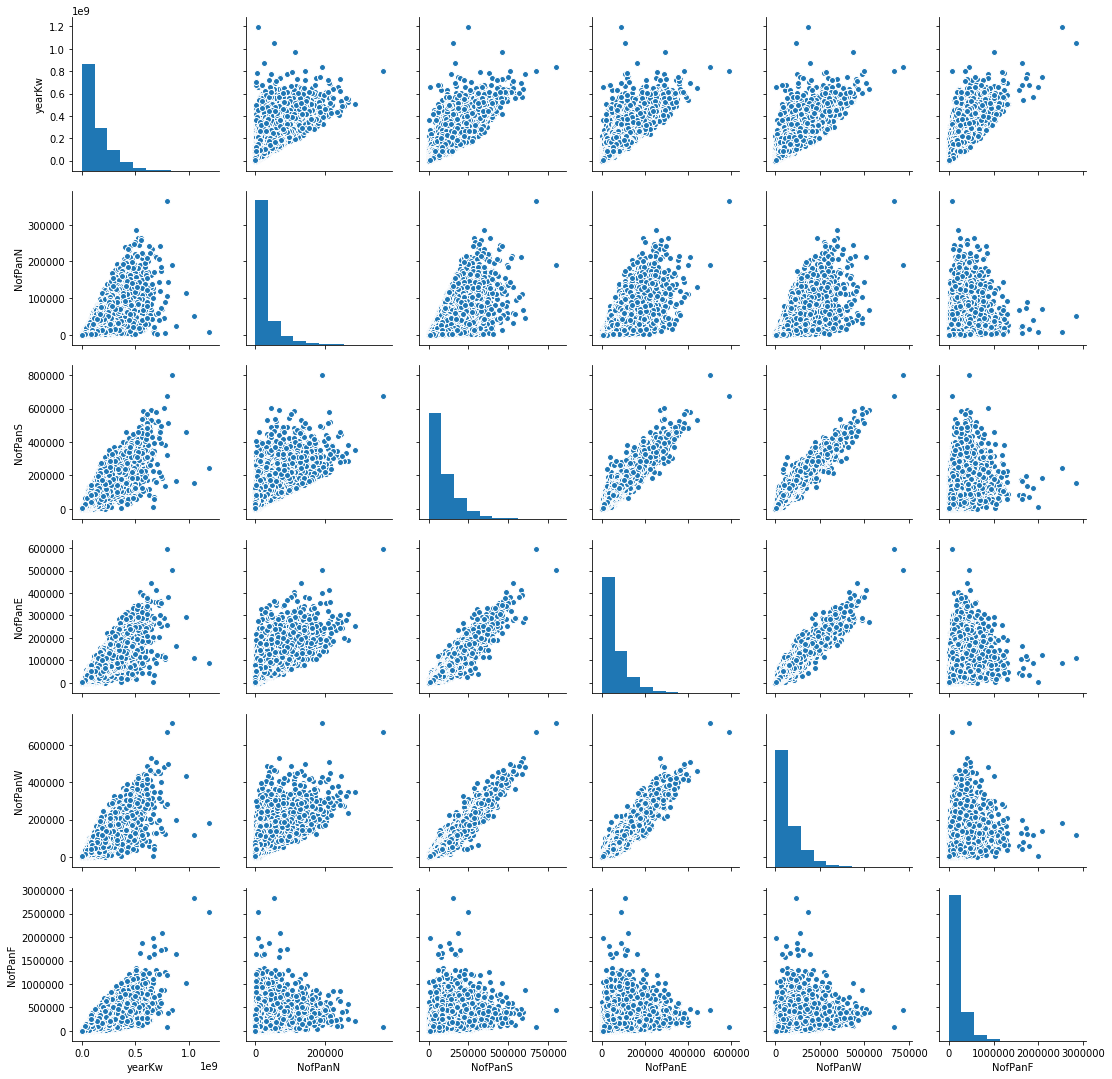

In [43]:
g = sns.pairplot(variables1)

In [44]:
# coefficient of correlation for dataset 1
variables1.corr()

yearKw   NofPanN   NofPanS   NofPanE   NofPanW   NofPanF
yearKw   1.000000  0.745020  0.887921  0.881526  0.889394  0.830741
NofPanN  0.745020  1.000000  0.717551  0.767489  0.758959  0.467394
NofPanS  0.887921  0.717551  1.000000  0.963556  0.974875  0.549055
NofPanE  0.881526  0.767489  0.963556  1.000000  0.972594  0.529094
NofPanW  0.889394  0.758959  0.974875  0.972594  1.000000  0.530186
NofPanF  0.830741  0.467394  0.549055  0.529094  0.530186  1.000000

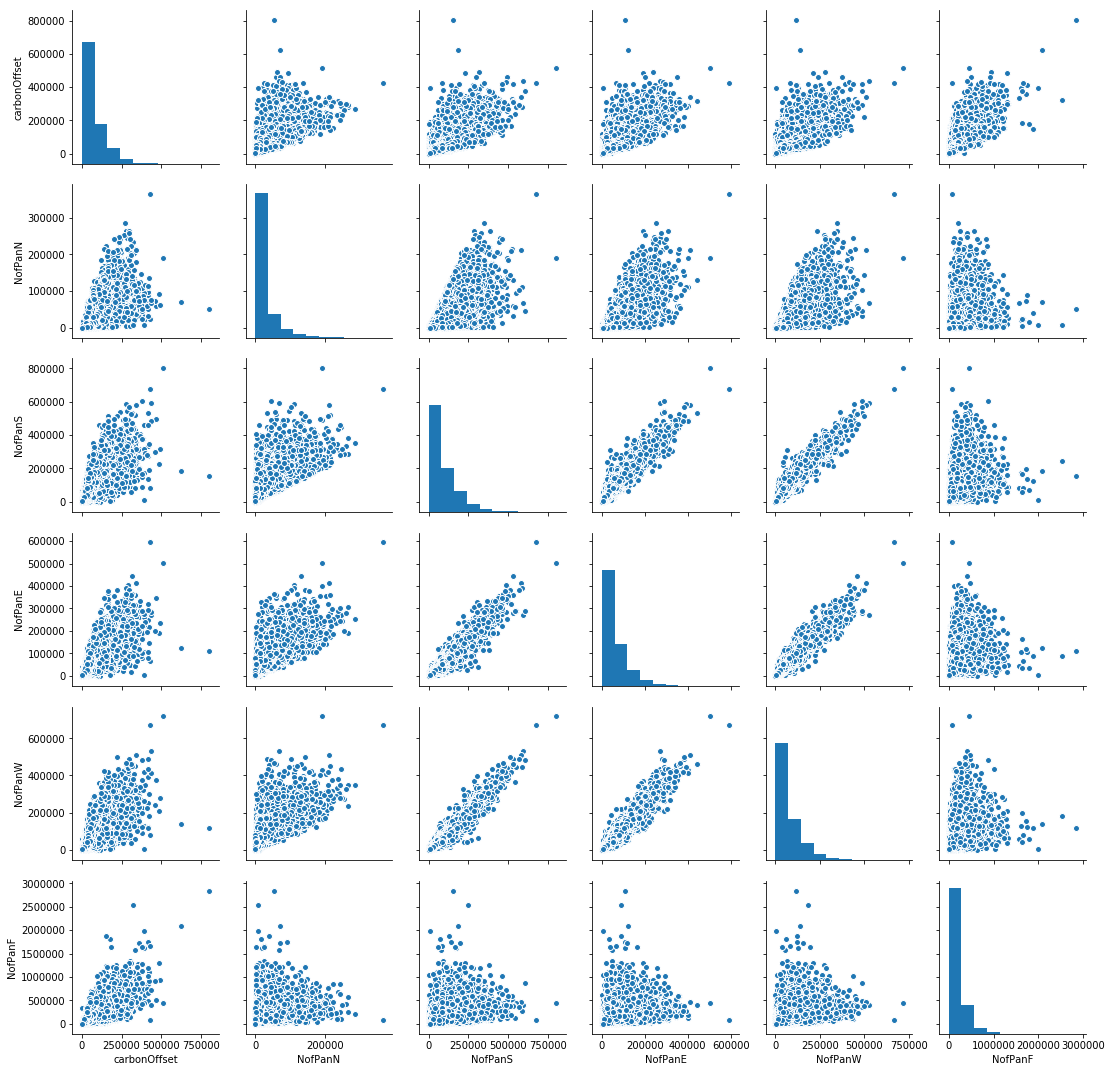

In [45]:
g = sns.pairplot(variables2)

In [46]:
# coefficient of correlation for dataset 2
variables2.corr()

carbonOffset   NofPanN   NofPanS   NofPanE   NofPanW   NofPanF
carbonOffset      1.000000  0.681414  0.810151  0.808352  0.798889  0.805285
NofPanN           0.681414  1.000000  0.717810  0.767693  0.759172  0.467896
NofPanS           0.810151  0.717810  1.000000  0.963607  0.974908  0.549666
NofPanE           0.808352  0.767693  0.963607  1.000000  0.972632  0.529706
NofPanW           0.798889  0.759172  0.974908  0.972632  1.000000  0.530787
NofPanF           0.805285  0.467896  0.549666  0.529706  0.530787  1.000000

- From the coefficient of correlation analysis for dataset 1, we can see that most of the control variables are highly correlated with dependent variable "yearKw".
- However, "NofPanS", "NofPanE", and "NofPanW" are highly correlated with each other, so we classify these three variables as one catagory. Since we are to the north of the equator, and since sun rises in the east and sets in the west, the most sunlight received is by the S,W and E directions and hence it makes sense for them to be collinear .
- We can make similar observation from the analysis for dataset 2, so we also classify "NofPanS", "NofPanE", and "NofPanW" as one catagory.

## Step 4-5: Regression Analysis

In [47]:
import statsmodels.formula.api as sm

##### Checking VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [49]:
V = variables1.drop(['yearKw'], axis=1)
X = add_constant(V)

In [50]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 
          index=X.columns)

const       2.104619
NofPanN     2.640231
NofPanS    24.146872
NofPanE    21.698194
NofPanW    30.669479
NofPanF     1.465236
dtype: float64

- According to the VIF analysis, we get the same conclusion from the correlation analysis, so we drop "NofPanE" and "NofPanW" and put "NofPanS", "NofPanN", and "NofPanF" in the full model.

In [51]:
V2 = variables1.drop(['yearKw', 'NofPanE', 'NofPanW'], axis=1)
X2 = add_constant(V2)

In [52]:
pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], 
          index=X2.columns)

const      2.083129
NofPanN    2.094662
NofPanS    2.343562
NofPanF    1.454699
dtype: float64

### Regression Analysis for dependent variable "kw_total"

##### Simple Regression for "yearKw" = $B_0$ + $B_1$"NofPanS"

In [53]:
result = sm.ols(formula="yearKw ~ NofPanS", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.788      
Dependent Variable:      yearKw              AIC:                   441764.2016
Date:                    2018-07-21 01:36    BIC:                   441778.8877
No. Observations:        11419               Log-Likelihood:        -2.2088e+05
Df Model:                1                   F-statistic:           4.254e+04  
Df Residuals:            11417               Prob (F-statistic):    0.00       
R-squared:               0.788               Scale:                 3.7059e+15 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept 15308560.0320 790348.3679  19.3694 0.0000 13759341.4566 16857778.6074
NofPanS       1335.0876      6.4731 206.2509 0.0000     1322.399

##### Simple Regression for "yearKw" = $B_0$ + $B_1$"NofPanN"

In [54]:
result = sm.ols(formula="yearKw ~ NofPanN", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.555      
Dependent Variable:      yearKw              AIC:                   450251.6073
Date:                    2018-07-21 01:36    BIC:                   450266.2934
No. Observations:        11419               Log-Likelihood:        -2.2512e+05
Df Model:                1                   F-statistic:           1.424e+04  
Df Residuals:            11417               Prob (F-statistic):    0.00       
R-squared:               0.555               Scale:                 7.7929e+15 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept 61353995.9736 998549.7404  61.4431 0.0000 59396666.9413 63311325.0060
NofPanN       2988.9576     25.0455 119.3411 0.0000     2939.864

##### Simple Regression for "yearKw" = $B_0$ + $B_1$"NofPanF"

In [55]:
result = sm.ols(formula="yearKw ~ NofPanF", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.690      
Dependent Variable:      yearKw              AIC:                   446120.1669
Date:                    2018-07-21 01:36    BIC:                   446134.8530
No. Observations:        11419               Log-Likelihood:        -2.2306e+05
Df Model:                1                   F-statistic:           2.543e+04  
Df Residuals:            11417               Prob (F-statistic):    0.00       
R-squared:               0.690               Scale:                 5.4271e+15 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept 34189185.3051 907504.5324  37.6738 0.0000 32410320.5211 35968050.0891
NofPanF        557.4705      3.4960 159.4605 0.0000      550.617

##### 2-Variables Regression for "yearKw" = $B_0$ + $B_1$"NofPanS" + $B_2$"NofPanN"

In [56]:
result = sm.ols(formula="yearKw ~ NofPanS + NofPanN", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.812      
Dependent Variable:      yearKw              AIC:                   440391.7959
Date:                    2018-07-21 01:36    BIC:                   440413.8250
No. Observations:        11419               Log-Likelihood:        -2.2019e+05
Df Model:                2                   F-statistic:           2.472e+04  
Df Residuals:            11416               Prob (F-statistic):    0.00       
R-squared:               0.812               Scale:                 3.2860e+15 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept 15632078.5425 744268.3610  21.0033 0.0000 14173184.6833 17090972.4017
NofPanS       1095.1356      8.7513 125.1399 0.0000     1077.981

##### 2-Variables Regression for "yearKw" = $B_0$ + $B_1$"NofPanS" + $B_2$"NofPanF"

In [57]:
result = sm.ols(formula="yearKw ~ NofPanS + NofPanF", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.957      
Dependent Variable:      yearKw              AIC:                   423558.2425
Date:                    2018-07-21 01:36    BIC:                   423580.2716
No. Observations:        11419               Log-Likelihood:        -2.1178e+05
Df Model:                2                   F-statistic:           1.272e+05  
Df Residuals:            11416               Prob (F-statistic):    0.00       
R-squared:               0.957               Scale:                 7.5239e+14 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept -6022863.6784 370094.4208 -16.2739 0.0000 -6748312.3285 -5297415.0284
NofPanS        929.4495      3.4897 266.3399 0.0000      922.609

##### 2-Variables Regression for "yearKw" = $B_0$ + $B_1$"NofPanN" + $B_2$"NofPanF"

In [58]:
result = sm.ols(formula="yearKw ~ NofPanN + NofPanF", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.853      
Dependent Variable:      yearKw              AIC:                   437609.6415
Date:                    2018-07-21 01:36    BIC:                   437631.6706
No. Observations:        11419               Log-Likelihood:        -2.1880e+05
Df Model:                2                   F-statistic:           3.311e+04  
Df Residuals:            11416               Prob (F-statistic):    0.00       
R-squared:               0.853               Scale:                 2.5754e+15 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept 17342955.0754 642862.7615  26.9777 0.0000 16082833.6136 18603076.5373
NofPanN       1831.2442     16.2866 112.4386 0.0000     1799.319

##### Regression for FULL model: "yearKw" = $B_0$ + $B_1$"NofPanS" + $B_2$"NofPanN" + $B_3$"NofPanF"

In [59]:
result = sm.ols(formula="yearKw ~ NofPanS + NofPanN + NofPanF", data = variables1).fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.968      
Dependent Variable:      yearKw              AIC:                   420252.1827
Date:                    2018-07-21 01:36    BIC:                   420281.5548
No. Observations:        11419               Log-Likelihood:        -2.1012e+05
Df Model:                3                   F-statistic:           1.145e+05  
Df Residuals:            11415               Prob (F-statistic):    0.00       
R-squared:               0.968               Scale:                 5.6320e+14 
-------------------------------------------------------------------------------
              Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------
Intercept -5117612.1566 320535.7530 -15.9658 0.0000 -5745917.3091 -4489307.0042
NofPanS        780.1984      3.8631 201.9622 0.0000      772.626

### Regression Analysis for dependent variable "carbonOffset"

##### Simple Regression for "carbonOffset" = $B_0$ + $B_1$"NofPanS"

In [60]:
result = sm.ols(formula="carbonOffset ~ NofPanS", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.656      
Dependent Variable: carbonOffset     AIC:                276185.7406
Date:               2018-07-21 01:36 BIC:                276200.4300
No. Observations:   11438            Log-Likelihood:     -1.3809e+05
Df Model:           1                F-statistic:        2.184e+04  
Df Residuals:       11436            Prob (F-statistic): 0.00       
R-squared:          0.656            Scale:              1.7950e+09 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  12136.9028 549.1724  22.1004 0.0000 11060.4307 13213.3749
NofPanS        0.6653   0.0045 147.7889 0.0000     0.6565     0.6741
--------------------------------------------------------------------
Omnibus:              5351.979      Durbin-Watson:   

##### Simple Regression for "carbonOffset" = $B_0$ + $B_1$"NofPanN"

In [61]:
result = sm.ols(formula="carbonOffset ~ NofPanN", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.464      
Dependent Variable: carbonOffset     AIC:                281262.9420
Date:               2018-07-21 01:36 BIC:                281277.6314
No. Observations:   11438            Log-Likelihood:     -1.4063e+05
Df Model:           1                F-statistic:        9913.      
Df Residuals:       11436            Prob (F-statistic): 0.00       
R-squared:          0.464            Scale:              2.7980e+09 
--------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept   34949.9845 597.6088 58.4830 0.0000 33778.5687 36121.4003
NofPanN         1.4936   0.0150 99.5630 0.0000     1.4642     1.5230
--------------------------------------------------------------------
Omnibus:              4717.084      Durbin-Watson:   

##### Simple Regression for "carbonOffset" = $B_0$ + $B_1$"NofPanF"

In [62]:
result = sm.ols(formula="carbonOffset ~ NofPanF", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.648      
Dependent Variable: carbonOffset     AIC:                276444.4203
Date:               2018-07-21 01:36 BIC:                276459.1097
No. Observations:   11438            Log-Likelihood:     -1.3822e+05
Df Model:           1                F-statistic:        2.110e+04  
Df Residuals:       11436            Prob (F-statistic): 0.00       
R-squared:          0.648            Scale:              1.8361e+09 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  18599.8896 527.0898  35.2879 0.0000 17566.7032 19633.0761
NofPanF        0.2952   0.0020 145.2495 0.0000     0.2912     0.2992
--------------------------------------------------------------------
Omnibus:              3075.523      Durbin-Watson:   

##### 2-Variables Regression for "carbonOffset" = $B_0$ + $B_1$"NofPanS" + $B_2$"NofPanN"

In [63]:
result = sm.ols(formula="carbonOffset ~ NofPanS + NofPanN", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.677      
Dependent Variable: carbonOffset     AIC:                275481.4111
Date:               2018-07-21 01:36 BIC:                275503.4452
No. Observations:   11438            Log-Likelihood:     -1.3774e+05
Df Model:           2                F-statistic:        1.198e+04  
Df Residuals:       11435            Prob (F-statistic): 0.00       
R-squared:          0.677            Scale:              1.6877e+09 
--------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept   12300.1358 532.5327 23.0974 0.0000 11256.2805 13343.9911
NofPanS         0.5438   0.0063 86.7456 0.0000     0.5315     0.5561
NofPanN         0.4516   0.0167 26.9889 0.0000     0.4188     0.4844
-----------------------------------------------------

##### 2-Variables Regression for "carbonOffset" = $B_0$ + $B_1$"NofPanS" + $B_2$"NofPanF"

In [64]:
result = sm.ols(formula="carbonOffset ~ NofPanS + NofPanF", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.842      
Dependent Variable: carbonOffset     AIC:                267298.0538
Date:               2018-07-21 01:36 BIC:                267320.0879
No. Observations:   11438            Log-Likelihood:     -1.3365e+05
Df Model:           2                F-statistic:        3.048e+04  
Df Residuals:       11435            Prob (F-statistic): 0.00       
R-squared:          0.842            Scale:              8.2522e+08 
---------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025    0.975] 
---------------------------------------------------------------------
Intercept   -56.2275  386.9253   -0.1453  0.8845  -814.6675  702.2124
NofPanS       0.4325    0.0037  118.3619  0.0000     0.4253    0.4396
NofPanF       0.1891    0.0016  115.9334  0.0000     0.1859    0.1923
-----------------------------------------------

##### 2-Variables Regression for "carbonOffset" = $B_0$ + $B_1$"NofPanN" + $B_2$"NofPanF"

In [65]:
result = sm.ols(formula="carbonOffset ~ NofPanN + NofPanF", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.767      
Dependent Variable: carbonOffset     AIC:                271728.6673
Date:               2018-07-21 01:36 BIC:                271750.7014
No. Observations:   11438            Log-Likelihood:     -1.3586e+05
Df Model:           2                F-statistic:        1.885e+04  
Df Residuals:       11435            Prob (F-statistic): 0.00       
R-squared:          0.767            Scale:              1.2156e+09 
--------------------------------------------------------------------
              Coef.    Std.Err.    t     P>|t|    [0.025    0.975]  
--------------------------------------------------------------------
Intercept   10758.3047 440.9911  24.3957 0.0000 9893.8866 11622.7229
NofPanN         0.8549   0.0112  76.4065 0.0000    0.8329     0.8768
NofPanF         0.2283   0.0019 122.0134 0.0000    0.2246     0.2320
-----------------------------------------------------

##### Regression for FULL model: "kw_total" = $B_0$ + $B_1$"NofPanS" + $B_2$"NofPanN" + $B_3$"NofPanF"

In [66]:
result = sm.ols(formula="carbonOffset ~ NofPanS + NofPanN + NofPanF", data = variables2).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.850      
Dependent Variable: carbonOffset     AIC:                266700.2297
Date:               2018-07-21 01:36 BIC:                266729.6085
No. Observations:   11438            Log-Likelihood:     -1.3335e+05
Df Model:           3                F-statistic:        2.161e+04  
Df Residuals:       11434            Prob (F-statistic): 0.00       
R-squared:          0.850            Scale:              7.8313e+08 
---------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
Intercept  369.9434  377.3193    0.9805  0.3269  -369.6673  1109.5540
NofPanS      0.3620    0.0046   79.4740  0.0000     0.3530     0.3709
NofPanN      0.2851    0.0115   24.8116  0.0000     0.2626     0.3076
NofPanF      0.1841    0.0016  114.9297  0.0000

## Step 4-6: Scalibility Analysis for Regression Model

In [67]:
import time 

def measureTime(fun,arg1,arg2):
    nTimes=50
    times=np.zeros(nTimes)
    for i in range(nTimes):
        startTime = time.time()    
        fun(arg1,arg2) #function is for regression
        endTime = time.time()
        times[i]=endTime-startTime
    return np.mean(times)


#Generates 'm' observations for a linear model whose coefficients are given in 'beta'.
def simulateData(m, beta, eps=1.0/(2**0.5)):
    n = len(beta) #Get number of coefficients
    X = np.random.rand(m, n) #Get m values for each of the independent variables
    X[:, 0] = 1.0 #The first indep variable is 1
    e = eps*np.random.randn(m, 1) #Get some random noise
    y = np.dot(X,beta) + e #generate the depended variable
    return (X, y)


#Solve for the coefcient of linear regression
def runRegression(X, y):
    result = np.linalg.lstsq(X, y, rcond=-1)
    b = result[0]
    return b

### Scalability for regression  model with dependent variable "yearKw"

In [68]:
result = sm.ols(formula="yearKw ~ NofPanS + NofPanN + NofPanF", data = variables1).fit()
trueBeta1 = []
i = 0
while i < len(result.params):
    trueBeta1.append(result.params[i])
    i+=1

In [69]:
trueBeta1=np.array([trueBeta1])
trueBeta1=trueBeta1.T

In [70]:
N = np.linspace(10, 100000, num=100, dtype=int)
times1 = np.zeros(len(N)) # create an array to store measured times in

for (i, n) in enumerate(N):
    (X, y) = simulateData(n, trueBeta1, eps=0.1)
    t = measureTime(runRegression, X, y)
    times1[i] = t

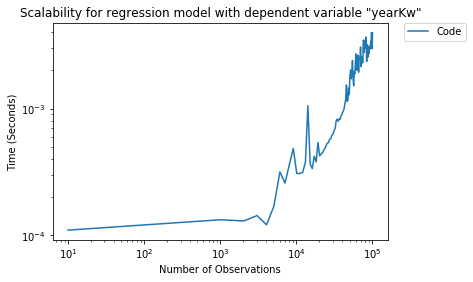

In [71]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog(N, times1, '-',label="Code") #plot in the log-log scale
plt.title('Scalability for regression model with dependent variable "yearKw"')
plt.xlabel('Number of Observations')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Scalability for regression  model with dependent variable "carbonOffset"

In [72]:
result = sm.ols(formula="carbonOffset ~ NofPanS + NofPanN + NofPanF", data = variables2).fit()
trueBeta2 = []
i = 0
while i < len(result.params):
    trueBeta2.append(result.params[i])
    i+=1

In [73]:
trueBeta2=np.array([trueBeta2])
trueBeta2=trueBeta2.T

In [74]:
N = np.linspace(10, 100000, num=100, dtype=int)
times2 = np.zeros(len(N)) # create an array to store measured times in

for (i, n) in enumerate(N):
    (X, y) = simulateData(n, trueBeta2, eps=0.1)
    t = measureTime(runRegression, X, y)
    times2[i] = t

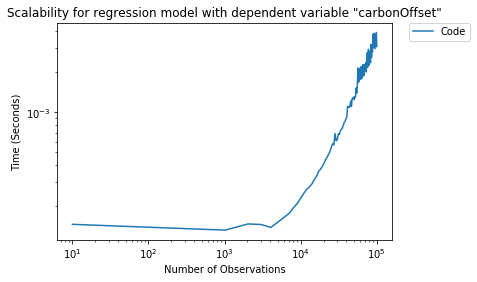

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog(N, times2, '-',label="Code") #plot in the log-log scale
plt.title('Scalability for regression model with dependent variable "carbonOffset"')
plt.xlabel('Number of Observations')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()